In [15]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"
data = obb.equity.price.historical("NVDA", provider="yfinance")
print(data)

                  open        high         low       close     volume  \
date                                                                    
2024-01-22   60.049000   60.331001   59.070000   59.653999  452955000   
2024-01-23   59.570000   59.910000   58.584999   59.873001  294654000   
2024-01-24   60.304001   62.848999   59.938000   61.362000  560271000   
2024-01-25   62.349998   62.719002   60.849998   61.617001  482777000   
2024-01-26   60.959999   61.783001   60.573002   61.030998  390309000   
...                ...         ...         ...         ...        ...   
2025-01-13  129.990005  133.490005  129.509995  133.229996  204808900   
2025-01-14  136.050003  136.380005  130.050003  131.759995  195590500   
2025-01-15  133.649994  136.449997  131.289993  136.240005  185217300   
2025-01-16  138.639999  138.750000  133.490005  133.570007  209235600   
2025-01-17  136.690002  138.500000  135.460007  137.710007  200492300   

            split_ratio  dividend  
date          

In [9]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"
data = obb.equity.fundamental.metrics("AAPL,MSFT,NVDA", provider="yfinance")
print(data)

  symbol    market_cap   pe_ratio  forward_pe  peg_ratio_ttm  \
0   AAPL  3.458416e+12  37.887970   27.693354         2.0958   
1   MSFT  3.189787e+12  35.457024   28.583687         2.2522   
2   NVDA  3.372518e+12  54.430832   30.964718         0.9870   

   enterprise_to_ebitda  earnings_growth  earnings_growth_quarterly  \
0                26.216           -0.341                     -0.358   
1                23.494            0.104                      0.107   
2                58.085            1.680                      1.682   

   revenue_per_share  revenue_growth  ...  price_to_book  enterprise_value  \
0             25.485           0.061  ...      61.051235     3530225090560   
1             34.202           0.160  ...      11.088052     3208195866624   
2              3.910           1.224  ...      78.962160     3553896693760   

   overall_risk  audit_risk  board_risk  compensation_risk  \
0           1.0         3.0         1.0                3.0   
1           3.0      

In [16]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"
data = obb.equity.compare.groups(group = "industry", metric = "valuation", provider = "finviz")
print(data)

                             name    market_cap  performance_1d     pe  \
0         Insurance - Reinsurance   48720000000          0.0011   6.32   
1                 REIT - Mortgage   58010000000          0.0084  14.44   
2                 Marine Shipping   32470000000         -0.0126   4.69   
3                     Coking Coal    9310000000          0.0216   9.12   
4          Paper & Paper Products   17560000000          0.0171  16.42   
..                            ...           ...             ...    ...   
140  REIT - Healthcare Facilities  160820000000          0.0018  94.75   
141                 REIT - Office   79550000000          0.0118  63.95   
142     Real Estate - Diversified    6900000000         -0.0085  45.44   
143     Infrastructure Operations   33980000000          0.0142  36.91   
144               Shell Companies   30220000000          0.0047  81.23   

     forward_pe     peg  eps_growth_past_5y  eps_growth_next_5y    volume  \
0          7.37    7.08           

In [24]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"
data = obb.equity.compare.groups(group="technology", metric="overview", provider="finviz")
print(data)

                                   name     market_cap  performance_1d  \
0                                 Solar    44960000000         -0.0016   
1               Communication Equipment   511520000000          0.0054   
2                 Electronic Components   268570000000          0.0063   
3                Software - Application  2903190000000          0.0064   
4       Information Technology Services  1030109999999          0.0064   
5                     Computer Hardware   398540000000          0.0065   
6   Electronics & Computer Distribution    31440000000          0.0067   
7                  Consumer Electronics  3587210000000          0.0078   
8    Scientific & Technical Instruments   201280000000          0.0085   
9             Software - Infrastructure  5088720000000          0.0092   
10  Semiconductor Equipment & Materials   746390000000          0.0147   
11                       Semiconductors  7091080000000          0.0242   

    dividend_yield     pe  forward_pe

<Axes: xlabel='expiration'>

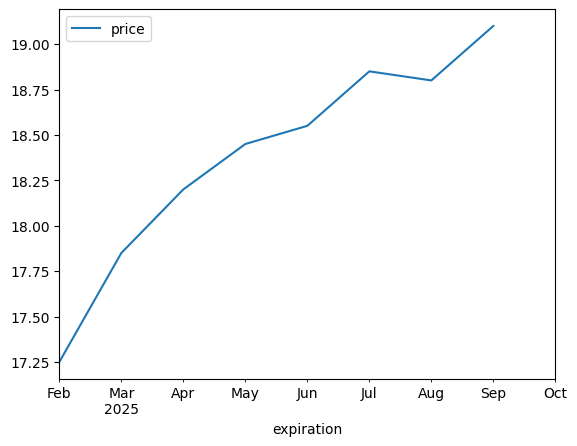

In [29]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"
data = obb.derivatives.futures.curve(symbol="VX")
data.index = pd.to_datetime(data.expiration)
data.plot()

<Axes: >

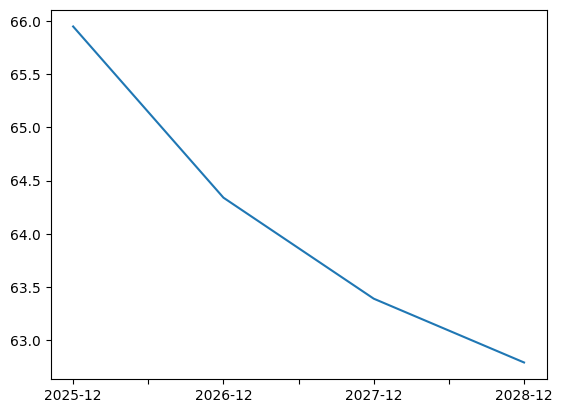

In [110]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

expirations = ["2025-12", "2026-12", "2027-12", "2028-12"]
contracts = []
for exp in expirations:
    data = obb.derivatives.futures.historical(symbol="CL", expiration=exp, start_date="2020-01-01", end_date="2024-12-01").rename(columns={"close": exp})
    contracts.append(data[exp])

historical = (pd.DataFrame(contracts).transpose().dropna())
historical.iloc[-1].plot()